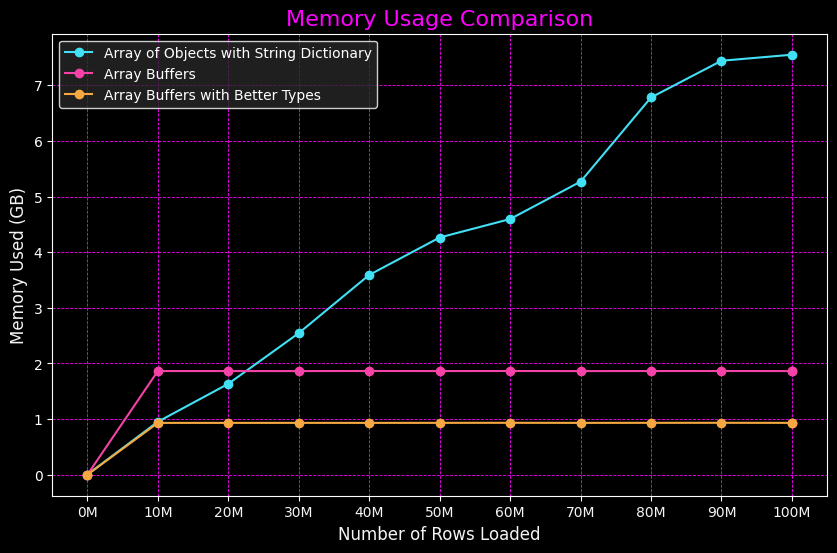

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
array_of_objects_string_dict_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjectsStringDictionary_100000000.csv")
array_buffer_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBuffer_100000000.csv")
array_buffer_better_types_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBufferBetterTypes_100000000.csv")
polars_df = pd.read_csv("/home/jack/code/df.ts/stats/polars_100000000.csv")

# Convert 'heapUsed' from bytes to gigabytes
array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 10_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 10_000_000

array_buffer_better_types_df['arrayBuffers_GB'] = array_buffer_better_types_df['arrayBuffers'] / (1024 ** 3)
array_buffer_better_types_df['rows_millions'] = array_buffer_better_types_df['rows'] / 10_000_000

# Filter data to include only rows where 'rows_millions' is a whole number (multiples of 10 million)
array_of_objects_string_dict_df = array_of_objects_string_dict_df[array_of_objects_string_dict_df['rows'] % 10_000_000 == 0]
array_buffer_df = array_buffer_df[array_buffer_df['rows'] % 10_000_000 == 0]
array_buffer_better_types_df = array_buffer_better_types_df[array_buffer_better_types_df['rows'] % 10_000_000 == 0]

# Apply Synthwave-style customizations
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))

# Plot data with synthwave colors
plt.plot(array_of_objects_string_dict_df['rows_millions'], array_of_objects_string_dict_df['heapUsed_GB'], marker='o', linestyle='-', color='#42e0f5', label='Array of Objects with String Dictionary')
plt.plot(array_buffer_df['rows_millions'], array_buffer_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#f542a7', label='Array Buffers')
plt.plot(array_buffer_better_types_df['rows_millions'], array_buffer_better_types_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#f5a742', label='Array Buffers with Better Types')

# Add labels and title with contrasting synthwave colors
plt.xlabel('Number Of Rows Loaded', fontsize=12, color='#f5f5f5')
plt.ylabel('Memory Used (GB)', fontsize=12, color='#f5f5f5')
plt.title('Memory Usage Comparison', fontsize=16, color='#ff00ff')

# Set x-axis ticks from 0 to 100 million rows
plt.xticks(ticks=range(0, 11), labels=[f'{i*10}M' for i in range(11)], fontsize=10, color='#f5f5f5')

# Add legend with a custom background and border color
legend = plt.legend(loc='upper left', fontsize=10)
legend.get_frame().set_edgecolor('#ffffff')
legend.get_frame().set_facecolor('#282828')

# Add grid with neon colors
plt.grid(True, which='both', color='#ff00ff', linestyle='--', linewidth=0.6)

# Save the plot
plt.savefig('/home/jack/code/df.ts/slides/memory_usage_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
